<a href="https://colab.research.google.com/github/FekadeTafess/Active-Trademark-Analysis/blob/main/Active_Trademark_Registrations_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sqlite3
import re

df = pd.read_csv('Active_Trademark_Registrations_20251221.csv')
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df['registration_date'] = pd.to_datetime(df['registration_date'], errors = 'coerce')
df['trademark_description'] = df['trademark_description'].str.replace('"', '').str.strip()
df['correspondent_name'] = df['correspondent_name'].str.strip().str.upper()

def standardize_firms(name):
  if pd.isna(name): return 'UNKNOWN'
  if 'TONKON TORP' in name: return 'TONKON TORP LLP'
  if 'STOEL RIVES' in name: return 'STOEL RIVES LLP'
  if 'MILLER NASH' in name: return 'MILLER NASH LLP'
  return name

df['clean_owner'] = df['correspondent_name'].apply(standardize_firms)

df['address2'] = df['address2'].fillna('N/A')
df['city'] = df['city'].fillna('UNKNOWN')
df['state'] = df['state'].fillna('OR')
df['zip'] = df['zip'].fillna('00000')

df = df.drop_duplicates()
df.to_csv('Cleaned_Oregon_Trademarks.csv', index=False)

In [ ]:
import pandas as pd

df = pd.read_csv('Active_Trademark_Registrations_20251221.csv')
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df['registration_date'] = pd.to_datetime(df['registration_date'], errors='coerce')
df['trademark_description'] = df['trademark_description'].str.strip().str.replace('"', '', regex=False)
df['correspondent_name'] = df['correspondent_name'].str.strip().str.upper()

fill_values = {
    'address1': 'NOT PROVIDED', 'address2': 'N/A', 'city': 'UNKNOWN',
    'state': 'OR', 'zip': '00000', 'trademark_description': 'NO DESCRIPTION PROVIDED',
    'correspondent_name': 'UNKNOWN'
}
df = df.fillna(value=fill_values)

df.to_csv('Oregon_Trademarks_Cleaned.csv', index=False)
df.to_excel('Oregon_Trademarks_Cleaned.xlsx', index=False)

print("Files created! Look in the 'Files' tab on the left sidebar to download them.")




Files created! Look in the 'Files' tab on the left sidebar to download them.


In [ ]:
import sqlite3
conn = sqlite3.connect(':memory:')
df.to_sql('trademarks', conn, index=False, if_exists='replace')

query = """
SELECT city, COUNT(*) as registration_count
FROM trademarks
WHERE city != 'UNKNOWN'
GROUP BY city
ORDER BY registration_count DESC
LIMIT 10
"""

top_cities_sql = pd.read_sql_query(query, conn)
print(top_cities_sql)


          city  registration_count
0     PORTLAND                1217
1        SALEM                 279
2       EUGENE                 197
3         BEND                 187
4    CORVALLIS                  78
5      SEATTLE                  76
6    BEAVERTON                  75
7  LAKE OSWEGO                  69
8      MEDFORD                  46
9  GRANTS PASS                  42


In [ ]:
import pandas as pd
import sqlite3
conn = sqlite3.connect(':memory:')
df.to_sql('trademarks', conn, index=False, if_exists='replace')

query = """
SELECT correspondent_name AS standardized_owner, COUNT(*) AS registration_count
FROM trademarks
WHERE correspondent_name != 'UNKNOWN'
GROUP BY correspondent_name
ORDER BY registration_count DESC
LIMIT 5;
"""

top_owners = pd.read_sql_query(query, conn)
print(top_owners)

                         standardized_owner  registration_count
0               STEPHANIE A. SCHOR, SR. AAG                  34
1                     EMERGE LAW GROUP P.C.                  26
2  CITY OF PORTLAND, CITY ATTORNEY'S OFFICE                  23
3                                PAUL LONEY                  22
4                          PARNA A MEHRBANI                  21


In [10]:
import sqlite3
conn = sqlite3.connect(':memory:')
df.to_sql('trademarks', conn, index=False, if_exists='replace')

query = """
SELECT strftime('%Y', registration_date) as reg_year, COUNT(*) as total
FROM trademarks
WHERE reg_year BETWEEN '2019' AND '2024'
GROUP BY reg_year
ORDER BY reg_year ASC;
"""
results = pd.read_sql_query(query, conn)
print(results)

  reg_year  total
0     2019    141
1     2020    168
2     2021    365
3     2022    318
4     2023    309
5     2024    399


In [11]:
import sqlite3
conn = sqlite3.connect(':memory:')
df.to_sql('trademarks', conn, index=False, if_exists='replace')

query = """
SELECT state, COUNT(*) as count,
       ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM trademarks), 2) AS percentage
FROM trademarks
GROUP BY state
ORDER BY count DESC
LIMIT 5;
"""
results = pd.read_sql_query(query, conn)
print(results)

  state  count  percentage
0    OR   3079       84.01
1    WA    179        4.88
2    CA    125        3.41
3    ID     28        0.76
4    FL     22        0.60


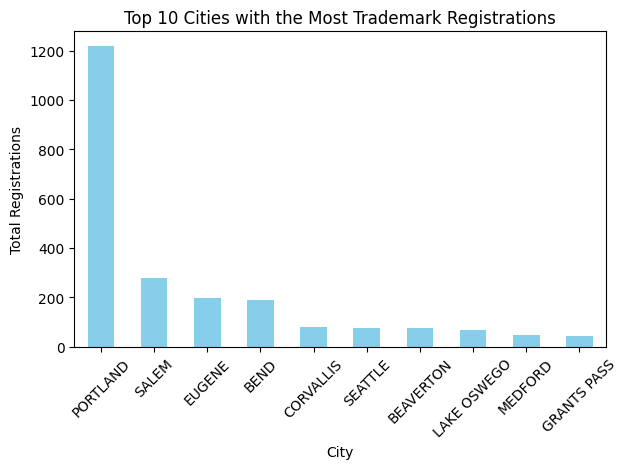

In [15]:
import sqlite3
conn = sqlite3.connect(':memory:')
df.to_sql('trademarks', conn, index=False, if_exists='replace')

query = """
SELECT
    city,
    COUNT(*) AS total_registrations
FROM trademarks
WHERE city != 'UNKNOWN'
GROUP BY city
ORDER BY total_registrations DESC
LIMIT 10;
"""
import matplotlib.pyplot as plt

results = pd.read_sql_query(query, conn)
results.set_index('city').plot(kind='bar', legend=False, color='skyblue')
plt.title('Top 10 Cities with the Most Trademark Registrations')
plt.xlabel('City')
plt.ylabel('Total Registrations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




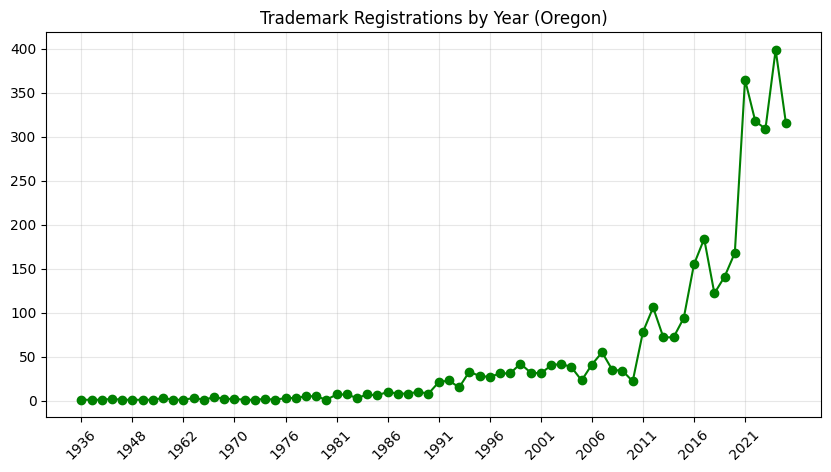

In [17]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect(':memory:')
df.to_sql('trademarks', conn, index=False, if_exists='replace')

query = """
SELECT
    strftime('%Y', registration_date) AS reg_year,
    COUNT(*) AS total
FROM trademarks
WHERE registration_date IS NOT NULL
GROUP BY reg_year
ORDER BY reg_year ASC;
"""

df_trends = pd.read_sql_query(query, conn)
plt.figure(figsize=(10, 5))
plt.plot(df_trends['reg_year'], df_trends['total'], marker='o', linestyle='-', color='green')
plt.title('Trademark Registrations by Year (Oregon)')
plt.grid(True, alpha=0.3)
plt.xticks(df_trends['reg_year'][::5], rotation=45)
plt.show()